In [4]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib
import statistics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import math 

# Documentation 


We got CNV data from 3 softwares; CNVnator, QDNASeq and WiseCondor for the 279 samples of Simmons diversity project.
    
The 279 files of CNVs from QDNASEQ were merged with this command: 
```
awk 'FNR==1 && NR!=1 { while (/^SAMPLE_NAME/) getline; } 1 {print}' *.seg > QDNASEQ_Result.txt


awk '{sub("/branchinecta/jbazanwilliamson/QDNASEQ_HG38/", "", $1); print}' < QDNASEQ_Result.txt > QDNASEQ_Result 


awk '{sub(".alt_bwamem_GRCh38DH.20200922.*.simons.cram.sort.bam.seg", "", $1); print}' < QDNASEQ_Result > QDNASEQ_Result.cvs

sed '1d' QDNASEQ_Result.cvs > QDNASEQ_data.txt
```

in /branchinecta/jbazanwilliamson/CNVnator directory 


Telomeres and centromeres coordinates were extracted in Genome Table Browser

Gene anotation was extracted in Genome Table Browser(GENECODE V39/KnownGene)

In [5]:
anotation = pd.read_csv('/branchinecta/jbazanwilliamson/SGDP_anotation.csv', sep=',', encoding='latin-1',  index_col=0)
telomeres = pd.read_table('/branchinecta/jbazanwilliamson/telomere_hg38')
centromeres = pd.read_table('/branchinecta/jbazanwilliamson/centromeres_hg38')
hm3_cnv_data = pd.read_table('/branchinecta/jbazanwilliamson/hm3_cnv_submission.txt')
header_list = ['SAMPLE_NAME','CHROMOSOME', 'START', 'END', 'DATAPOINTS', 'LOG2']
cnvnator_data = pd.read_table('/branchinecta/jbazanwilliamson/QDNASEQ_HG38/QDNASEQ_data.txt', delimiter=' ', names=header_list)

telomeres['chrom'] = telomeres['chrom'].str.replace('chr', '')


centromeres['chrom'] = centromeres['chrom'].str.replace('chr', '')

#Table browser is 0-based coordinates, changed to 1-based for compability with CNV data
telomeres['chromStart'] = telomeres['chromStart'] + 1

centromeres['chromStart'] = centromeres['chromStart'] + 1

hm3_cnv_data['chr'] = hm3_cnv_data['chr'].astype(str)

cnvnator_data

FileNotFoundError: [Errno 2] No such file or directory: '/branchinecta/jbazanwilliamson/QDNASEQ_HG38/QDNASEQ_data.txt'

In [ ]:
anotation

In [3]:
input_freq = cnvnator_data.set_index('SAMPLE_NAME')

input_freq_anotation = anotation.drop(['3-Illumina_ID', '4-reich_id', '5-ena_ftp_bam_ptr', '6-Sequencing_Panel', '7-Gender', '8-Population_ID', '9-Contributor', '11-Country','12-Town', '13-Latitude','14-Longitude','15-DNA_Source', '16-BioSamples Accession', '17-Embargo'], axis = 1)
input_freq_anotation.merge(input_freq, left_index=True, right_index=True)

NameError: name 'cnvnator_data' is not defined

In [5]:
genes_anotation = pd.read_table('/branchinecta/jbazanwilliamson/Genes_coordinates.txt')

genes_anotation = genes_anotation[genes_anotation['transcriptClass']=='coding']
genes_anotation

,#chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,blockCount,...,type,geneName,geneName2,geneType,transcriptClass,source,transcriptType,tag,level,tier
12,chr1,65418,71585,ENST00000641515.2,0,+,65564,70008,789624,3,...,none,OR4F5,A0A2U3U0J3,none,coding,havana_homo_sapiens,protein_coding,"Ensembl_canonical,MANE_Select,RNA_Seq_supporte...",2,"canonical,basic,all"
50,chr1,450739,451678,ENST00000426406.4,0,-,450739,451678,789624,1,...,none,OR4F29,Q6IEY1,none,coding,ensembl_havana_transcript_homo_sapiens,protein_coding,"CCDS,Ensembl_canonical,MANE_Select,appris_prin...",2,"canonical,basic,all"
97,chr1,685715,686654,ENST00000332831.5,0,-,685715,686654,789624,1,...,none,OR4F16,Q6IEY1,none,coding,ensembl_havana_transcript_homo_sapiens,protein_coding,"CCDS,Ensembl_canonical,MANE_Select,appris_prin...",2,"canonical,basic,all"
198,chr1,923922,944574,ENST00000616016.5,0,+,924431,944153,789624,14,...,none,SAMD11,I7G285,none,coding,havana_homo_sapiens,protein_coding,"CAGE_supported_TSS,Ensembl_canonical,MANE_Sele...",2,"basic,all"
199,chr1,923922,944574,ENST00000618323.5,0,+,924431,944153,789624,14,...,none,SAMD11,A0A087WX24,none,coding,havana_homo_sapiens,protein_coding,"CAGE_supported_TSS,appris_principal_5,basic",2,"canonical,basic,all"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266053,chr22_KI270731v1_random,10597,13001,ENST00000619792.1,0,-,11287,12574,789624,1,...,none,ENSG00000278633,none,none,coding,ensembl_homo_sapiens,protein_coding,"Ensembl_canonical,basic",3,"canonical,basic,all"
266060,chr22_KI270734v1_random,72410,74814,ENST00000617983.1,0,+,72837,74124,789624,1,...,none,ENSG00000276017,none,none,coding,ensembl_homo_sapiens,protein_coding,"Ensembl_canonical,basic",3,"canonical,basic,all"
266061,chr22_KI270734v1_random,131493,137392,ENST00000613204.1,0,+,131645,136994,789624,5,...,none,ENSG00000278817,X5D7D2,none,coding,ensembl_homo_sapiens,protein_coding,"Ensembl_canonical,basic",3,"canonical,basic,all"
266062,chr22_KI270734v1_random,138081,161750,ENST00000615165.1,0,-,138479,156446,789624,14,...,none,ENSG00000277196,none,none,coding,ensembl_homo_sapiens,protein_coding,basic,3,"basic,all"


In [6]:
#cnvnator_data['POSITION'].str.split(delimiter, expand=True)

cnvnator_style= pd.DataFrame()
cnvnator_style['Sample_ID'] = cnvnator_data['SAMPLE_NAME']
cnvnator_style['Chr'] = cnvnator_data['CHROMOSOME']
cnvnator_style['Start'] = cnvnator_data['START']
cnvnator_style['End'] = cnvnator_data['END']
cnvnator_style['CNV_value'] = cnvnator_data['LOG2']

cnvnator_style

# NOTE: 
# This result were used as output for CNVR detection for CNVnator


,Sample_ID,Chr,Start,End,CNV_value
0,SAMEA3302610,1,12795001,12870000,0.52
1,SAMEA3302610,4,69255001,69345000,-3.28
2,SAMEA3302610,4,143895001,144120000,0.57
3,SAMEA3302610,4,186015001,186210000,0.54
4,SAMEA3302610,5,77760001,77805000,0.51
...,...,...,...,...,...
4126,SAMEA3302911,X,2775001,155715000,-1.01
4127,SAMEA3302911,Y,2775001,11295000,-0.97
4128,SAMEA3302911,Y,11295001,11340000,1.01
4129,SAMEA3302911,Y,11340001,56730000,-0.99


In [7]:
# Filter inviduals that have less than 100 CNVs
cnvnator_style.groupby('Sample_ID').filter(lambda x : (x['Sample_ID'].count()<=100).any())

,Sample_ID,Chr,Start,End,CNV_value
0,SAMEA3302610,1,12795001,12870000,0.52
1,SAMEA3302610,4,69255001,69345000,-3.28
2,SAMEA3302610,4,143895001,144120000,0.57
3,SAMEA3302610,4,186015001,186210000,0.54
4,SAMEA3302610,5,77760001,77805000,0.51
...,...,...,...,...,...
4126,SAMEA3302911,X,2775001,155715000,-1.01
4127,SAMEA3302911,Y,2775001,11295000,-0.97
4128,SAMEA3302911,Y,11295001,11340000,1.01
4129,SAMEA3302911,Y,11340001,56730000,-0.99


In [8]:
# To array for loop purposes 

np_cnvnator_style = cnvnator_style.to_numpy()

telomeres = telomeres.to_numpy()
centromeres = centromeres.to_numpy()

np_hm3 = hm3_cnv_data.to_numpy()


# DO NOT RUN IT
wotelomeres= []

wocentromeres = []

for telomere in telomeres:
    for cnv in np_cnvnator_style:
        if cnv[1] == telomere[1]: #Chromosome
            if telomere[2] in range (int(cnv[2]), int(cnv[3]), 1):             
                wotelomeres.append(cnv)
            #elif telomere[3] in range (int(cnv[2]), int(cnv[3]), 1):
             #   wotelomeres.append(cnv)
                
                
wotelomeres = np.array(wotelomeres)

for centromere in centromeres:
    for cnv_wo_telomeres in wotelomeres:
        if cnv_wo_telomeres[1] == centromere[1]: #Chromosome
            if centromere[2] in range (int(cnv_wo_telomeres[2]), int(cnv_wo_telomeres[3]), 1):
                wocentromeres.append(cnv_wo_telomeres) 
                
            #elif centromere[3] in range (int(cnv_wo_telomeres[2]), int(cnv_wo_telomeres[3]), 1): 
                
            #    wocentromeres.append(cnv_wo_telomeres) 

                
                
            #data.append(cnvnator_style.iloc[index])
                
            #if cnvnator_style.iloc[index]['Start'] <= telomeres.iloc[index]['chromStart'] <= cnvnator_style.iloc[index]['End']:
            
           # if print(cnvnator_style.iloc[index])

In [9]:
wotelomeres= []

wocentromeres = []


for telomere in telomeres:
    for cnv in np_cnvnator_style:
    
        if cnv[1] == telomere[1]: #Chromosome
            if telomere[2] <= cnv[2] <= telomere[3]:
                wotelomeres.append(cnv)
                
            if telomere[3] <= cnv[3] <= telomere[3]:
                wotelomeres.append(cnv)
         
           # if cnv[2] != int(telomere[2]): #not in range (int(cnv[2]), int(cnv[3])+1, 1): #and telomere[3] not in range (int(cnv[2]), int(cnv[3]), 1):
           #notelomeres.append(cnv)
                
                
#if not telomere[2] <= int(cnv[2]) <= telomere[3]:
#                    if not telomere[2] <= int(cnv[3]) <= telomere[3]:
#                        print(cnv)
                
            #if cnv[2] not in range (int(telomere[2]), int(telomere[3]), 1):# and cnv[3] in range (int(telomere[2]), int(telomere[3]), 1):             
              #print(cnv)#wotelomeres.append(cnv)
                
wotelomeres = np.array(wotelomeres)

for centromere in centromeres:
    for cnv in np_cnvnator_style:
        
        if cnv[1] == centromere[1]: #Chromosome
            if centromere[2] <= cnv[2] <= centromere[3]:
                wocentromeres.append(cnv) 
                
            if centromere[2] <= cnv[3] <= centromere[3]:
                wocentromeres.append(cnv) 
wocentromeres = np.array(wocentromeres)
                    
                
       #     if not in range (int(centromere[2]), int(centromere[3]), 1) and cnv_wo_telomeres[3] not in range (int(centromere[2]), int(centromere[3]), 1):             
            #    wocentromeres.append(cnv_wo_telomeres) 
                
                
            #data.append(cnvnator_style.iloc[index])
                
            #if cnvnator_style.iloc[index]['Start'] <= telomeres.iloc[index]['chromStart'] <= cnvnator_style.iloc[index]['End']:
            
           # if print(cnvnator_style.iloc[index])

In [10]:
telomeres_data = pd.DataFrame(wotelomeres)
centromeres_data = pd.DataFrame(wocentromeres)

frames = [telomeres_data, centromeres_data]

result = pd.concat(frames)

result.columns =['Sample_ID', 'Chr', 'Start', 'End', 'CNV_value']
result = result.drop_duplicates()
#result


df = pd.concat([result, cnvnator_style])
df = df.drop_duplicates(keep=False)

chromosomes= ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','X','Y']

df = df[df.Chr.isin(chromosomes)]

df['Start'] = df['Start'].astype(int)
df['End'] = df['End'].astype(int)
df['CNV_value'] = df['CNV_value'].astype(float)

df.to_csv("cnvator_data_no_telo_no_centro.csv",  index= False)
df

,Sample_ID,Chr,Start,End,CNV_value
0,SAMEA3302610,1,12795001,12870000,0.52
1,SAMEA3302610,4,69255001,69345000,-3.28
2,SAMEA3302610,4,143895001,144120000,0.57
3,SAMEA3302610,4,186015001,186210000,0.54
4,SAMEA3302610,5,77760001,77805000,0.51
...,...,...,...,...,...
4126,SAMEA3302911,X,2775001,155715000,-1.01
4127,SAMEA3302911,Y,2775001,11295000,-0.97
4128,SAMEA3302911,Y,11295001,11340000,1.01
4129,SAMEA3302911,Y,11340001,56730000,-0.99


In [36]:

frames 

[Empty DataFrame
 Columns: [0]
 Index: [],
                 0   1         2          3     4
 0    SAMEA3302613   X  58875001   62220000 -7.23
 1    SAMEA3302613   X  58875001   62220000 -7.23
 2    SAMEA3302619   X  58875001   62220000 -7.94
 3    SAMEA3302619   X  58875001   62220000 -7.94
 4    SAMEA3302621   X  58875001   62220000 -8.26
 ..            ...  ..       ...        ...   ...
 97   SAMEA3302903   X  59370001  155715000 -5.24
 98   SAMEA3302906   X  58875001   62220000 -5.62
 99   SAMEA3302906   X  58875001   62220000 -5.62
 100  SAMEA3302850   Y   2775001   10380000 -9.04
 101  SAMEA3302679  20  28545001   30900000  0.11
 
 [102 rows x 5 columns]]

In [11]:
size_df = np.array(df)
size_df


size = []

for cnv in size_df:
    if cnv[3] - cnv[2] > 1000:
        if cnv[3] - cnv[2] < 2000000:
            size.append(cnv)
            


df = pd.DataFrame(size)
df.columns =['Sample_ID', 'Chr', 'Start', 'End', 'CNV_value']
df

#d= df.drop(df[(df['CNV_value'] > 0.3) & (df['CNV_value'] < -0.3)])
df = df.loc[~((df['CNV_value'] < 0.3) & (df['CNV_value'] > -0.3)),:]
df
#df[df.CNV_value > 0.3 & df.CNV_value < -0.3]



,Sample_ID,Chr,Start,End,CNV_value
0,SAMEA3302610,1,12795001,12870000,0.52
1,SAMEA3302610,4,69255001,69345000,-3.28
2,SAMEA3302610,4,143895001,144120000,0.57
3,SAMEA3302610,4,186015001,186210000,0.54
4,SAMEA3302610,5,77760001,77805000,0.51
...,...,...,...,...,...
3263,SAMEA3302911,9,101910001,102210000,-0.97
3264,SAMEA3302911,14,19725001,19950000,0.59
3265,SAMEA3302911,17,36105001,36150000,0.51
3266,SAMEA3302911,Y,11295001,11340000,1.01


In [12]:
# telomeres and centromeres filtration
final_cnv = df.pivot_table(index=["Chr", "Start", "End"], 
                    columns='Sample_ID', 
                    values='CNV_value').reset_index()


final_cnv



Sample_ID,Chr,Start,End,SAMEA3302610,SAMEA3302613,SAMEA3302615,SAMEA3302618,SAMEA3302619,SAMEA3302621,SAMEA3302624,...,SAMEA3302882,SAMEA3302883,SAMEA3302886,SAMEA3302887,SAMEA3302889,SAMEA3302896,SAMEA3302903,SAMEA3302906,SAMEA3302908,SAMEA3302911
0,1,810001,915000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.88
1,1,810001,930000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1440001,1500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,10215001,10260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,12795001,12840000,NaN,-0.71,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,Y,11295001,11340000,1.11,NaN,NaN,0.92,NaN,NaN,NaN,...,NaN,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.01
638,Y,11340001,11865000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,Y,20055001,20325000,NaN,NaN,NaN,NaN,NaN,NaN,-5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,Y,56820001,56895000,1.98,NaN,NaN,1.97,NaN,1.71,NaN,...,NaN,1.81,NaN,1.0,NaN,NaN,NaN,NaN,1.66,2.10


In [13]:
#WITHOUT Telomeres and Centromers filtration
final_cnv_no_filter = cnvnator_data.pivot_table(index=["CHROMOSOME", "START", "END"], 
                    columns='SAMPLE_NAME', 
                    values='LOG2').reset_index()



In [14]:
final = final_cnv.dropna(thresh=4)
final



Sample_ID,Chr,Start,End,SAMEA3302610,SAMEA3302613,SAMEA3302615,SAMEA3302618,SAMEA3302619,SAMEA3302621,SAMEA3302624,...,SAMEA3302882,SAMEA3302883,SAMEA3302886,SAMEA3302887,SAMEA3302889,SAMEA3302896,SAMEA3302903,SAMEA3302906,SAMEA3302908,SAMEA3302911
0,1,810001,915000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.88
1,1,810001,930000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1440001,1500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,10215001,10260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,12795001,12840000,NaN,-0.71,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,Y,11295001,11340000,1.11,NaN,NaN,0.92,NaN,NaN,NaN,...,NaN,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.01
638,Y,11340001,11865000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,Y,20055001,20325000,NaN,NaN,NaN,NaN,NaN,NaN,-5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,Y,56820001,56895000,1.98,NaN,NaN,1.97,NaN,1.71,NaN,...,NaN,1.81,NaN,1.0,NaN,NaN,NaN,NaN,1.66,2.10


In [15]:
counts = final.iloc[:,3:283]
counts = counts.fillna(0)
#counts = np.log2(counts)
counts

Sample_ID,SAMEA3302610,SAMEA3302613,SAMEA3302615,SAMEA3302618,SAMEA3302619,SAMEA3302621,SAMEA3302624,SAMEA3302630,SAMEA3302631,SAMEA3302632,...,SAMEA3302882,SAMEA3302883,SAMEA3302886,SAMEA3302887,SAMEA3302889,SAMEA3302896,SAMEA3302903,SAMEA3302906,SAMEA3302908,SAMEA3302911
0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.88
1,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
2,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
3,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
4,0.00,-0.71,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,1.11,0.00,0.0,0.92,0.00,0.00,0.0,0.92,0.00,0.96,...,0.00,0.78,0.00,0.0,0.00,0.0,0.00,0.0,0.00,1.01
638,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
639,0.00,0.00,0.0,0.00,0.00,0.00,-5.8,0.00,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00
640,1.98,0.00,0.0,1.97,0.00,1.71,0.0,1.74,1.89,1.65,...,0.00,1.81,0.00,1.0,0.00,0.0,0.00,0.0,1.66,2.10


In [16]:
import scipy
#counts_np = scipy.stats.zscore(counts, axis=0)
#counts_np


<AxesSubplot:ylabel='Count'>

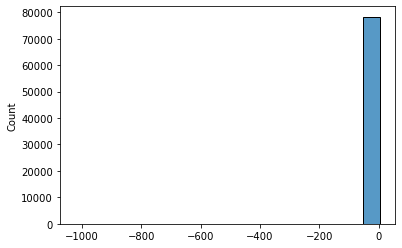

In [18]:
hist = (np.array(counts).flatten())
seaborn.histplot(hist)

In [29]:
#track features for pca & tsne
count = counts.T
features = anotation.merge(count, left_index=True, right_index=True)
features = features.loc[:,["7-Gender","10-Region", "11-Country"]]
features

#imputation and normalization 
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X = imp.fit_transform(counts.T)
X = StandardScaler().fit_transform(X)


#PCA
#pca = PCA(.95)
pca = PCA(n_components=10)
pca_results = pca.fit_transform(X)

df_pca= pd.DataFrame(pca_results,
                          columns=['component_1','component_2', 'component_3','component_4','component_5', 'component_6', 'component_7','component_8', 'component_9','component_10'],
                          index=features.index)




df_pca = features.merge(df_pca, left_index=True, right_index=True)
df_pca 

,7-Gender,10-Region,11-Country,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
SAMEA3302859,F,WestEurasia,Iceland,-0.753473,-0.526982,-0.455685,-0.268331,-0.462212,-0.001086,-0.184582,-0.907862,-1.769603,-1.084333
SAMEA3302837,F,WestEurasia,Iceland,-0.783148,-0.712793,-0.641436,-1.915312,-2.172402,-1.798068,2.071417,28.678990,-4.322914,4.445686
SAMEA3302647,M,Africa,SierraLeone,-0.696122,-0.489483,-0.360796,-0.389913,-0.588768,-0.094535,-0.231692,-0.126065,0.173955,-0.673182
SAMEA3302748,F,Africa,SierraLeone,-0.748513,-0.519592,-0.452098,-0.543490,-0.568178,-0.378697,-0.081055,-0.556458,-0.688699,-0.996848
SAMEA3302675,M,WestEurasia,Jordan,-0.754097,-0.562691,-0.453215,-0.610450,-1.200842,-0.368680,-0.315821,-0.149599,0.819244,-0.656817
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMEA3302786,M,WestEurasia,Russia,-0.724245,-0.526729,-0.412955,-0.021718,-0.788310,-0.002984,-0.178827,-0.624931,-0.338936,0.859815
SAMEA3302790,M,America,Brazil,-0.733949,-0.619168,-0.523013,-1.324284,-1.748918,-1.129798,-2.071110,9.047272,3.922344,-0.185581
SAMEA3302662,F,America,Brazil,-0.720030,-0.521541,-0.400736,-0.404636,-0.616542,-0.073336,0.334605,-0.458478,-0.779473,-0.499713
SAMEA3302766,F,WestEurasia,Russia,-0.725470,-0.541282,-0.467875,-0.413573,-0.660161,-0.030793,0.162422,-0.160621,-0.222952,-0.291660


In [30]:
pca.explained_variance_ratio_


array([0.10000271, 0.0619378 , 0.04533241, 0.01734844, 0.0163451 ,
       0.01498409, 0.01436946, 0.01321408, 0.01239781, 0.01170124])

In [32]:
df_pca = df_pca[df_pca['component_1'] < 10]
df_pca = df_pca[df_pca['component_2'] < 10]
df_pca

,7-Gender,10-Region,11-Country,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10
SAMEA3302859,F,WestEurasia,Iceland,-0.753473,-0.526982,-0.455685,-0.268331,-0.462212,-0.001086,-0.184582,-0.907862,-1.769603,-1.084333
SAMEA3302837,F,WestEurasia,Iceland,-0.783148,-0.712793,-0.641436,-1.915312,-2.172402,-1.798068,2.071417,28.678990,-4.322914,4.445686
SAMEA3302647,M,Africa,SierraLeone,-0.696122,-0.489483,-0.360796,-0.389913,-0.588768,-0.094535,-0.231692,-0.126065,0.173955,-0.673182
SAMEA3302748,F,Africa,SierraLeone,-0.748513,-0.519592,-0.452098,-0.543490,-0.568178,-0.378697,-0.081055,-0.556458,-0.688699,-0.996848
SAMEA3302675,M,WestEurasia,Jordan,-0.754097,-0.562691,-0.453215,-0.610450,-1.200842,-0.368680,-0.315821,-0.149599,0.819244,-0.656817
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMEA3302786,M,WestEurasia,Russia,-0.724245,-0.526729,-0.412955,-0.021718,-0.788310,-0.002984,-0.178827,-0.624931,-0.338936,0.859815
SAMEA3302790,M,America,Brazil,-0.733949,-0.619168,-0.523013,-1.324284,-1.748918,-1.129798,-2.071110,9.047272,3.922344,-0.185581
SAMEA3302662,F,America,Brazil,-0.720030,-0.521541,-0.400736,-0.404636,-0.616542,-0.073336,0.334605,-0.458478,-0.779473,-0.499713
SAMEA3302766,F,WestEurasia,Russia,-0.725470,-0.541282,-0.467875,-0.413573,-0.660161,-0.030793,0.162422,-0.160621,-0.222952,-0.291660


            7-Gender   11-Country  component_1  component_2  component_3  \
10-Region                                                                  
WestEurasia        F      Iceland    -0.753473    -0.526982    -0.455685   
WestEurasia        F      Iceland    -0.783148    -0.712793    -0.641436   
Africa             M  SierraLeone    -0.696122    -0.489483    -0.360796   
Africa             F  SierraLeone    -0.748513    -0.519592    -0.452098   
WestEurasia        M       Jordan    -0.754097    -0.562691    -0.453215   
...              ...          ...          ...          ...          ...   
WestEurasia        M       Russia    -0.724245    -0.526729    -0.412955   
America            M       Brazil    -0.733949    -0.619168    -0.523013   
America            F       Brazil    -0.720030    -0.521541    -0.400736   
WestEurasia        F       Russia    -0.725470    -0.541282    -0.467875   
WestEurasia        M        Yemen    -0.763096    -0.573428    -0.523136   

           

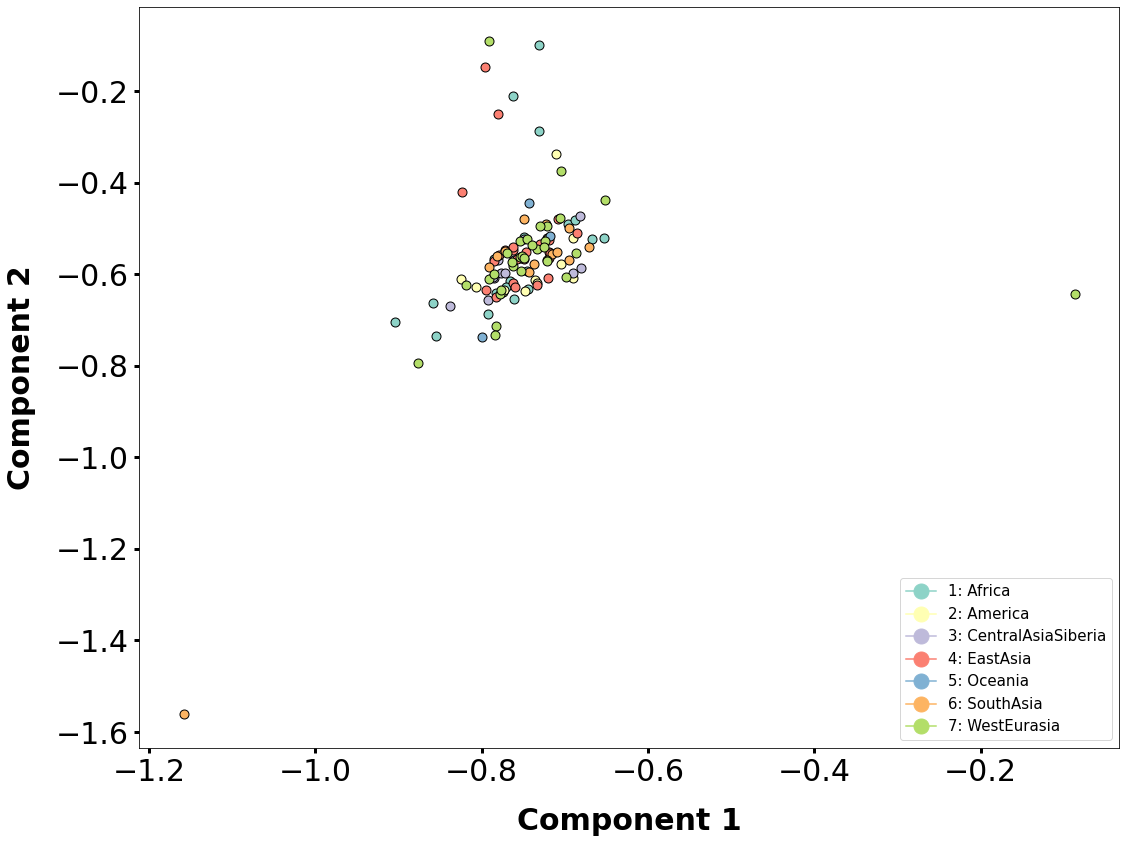

In [35]:
pcaplot= plot_scatter_cluster(data=df_pca, abscissa='component_1', ordinate='component_2', label_horizontal='Component 1', label_vertical='Component 2', factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)

#poner variacion de componentes.

In [34]:
#TSNE 
tsne = TSNE(n_components=3)
tsne_results = tsne.fit_transform(X)

df_tsne= pd.DataFrame(tsne_results,
                          columns=['component_1','component_2', 'component_3'],
                          index=features.index)



df_tsne = features.merge(df_tsne, left_index=True, right_index=True)
df_tsne

,7-Gender,10-Region,11-Country,component_1,component_2,component_3
SAMEA3302859,F,WestEurasia,Iceland,-64.735130,7.742495,-220.120087
SAMEA3302837,F,WestEurasia,Iceland,-57.657761,149.911011,182.655258
SAMEA3302647,M,Africa,SierraLeone,12.565177,139.194183,47.627785
SAMEA3302748,F,Africa,SierraLeone,-45.149437,72.075462,17.324900
SAMEA3302675,M,WestEurasia,Jordan,-19.206484,-18.381943,240.991913
...,...,...,...,...,...,...
SAMEA3302786,M,WestEurasia,Russia,41.769077,30.409267,-35.558117
SAMEA3302790,M,America,Brazil,98.677719,163.567429,73.469360
SAMEA3302662,F,America,Brazil,-26.806955,-215.250778,65.135391
SAMEA3302766,F,WestEurasia,Russia,-59.190662,-43.652557,35.483612


In [24]:
tsneplot= plot_scatter_cluster(data=df_tsne, abscissa='component_1', ordinate='component_2', label_horizontal='Component 1', label_vertical='Component 2', factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)




NameError: name 'plot_scatter_cluster' is not defined

In [209]:
mds = MDS(3,random_state=0)
mds_results = mds.fit_transform(X)

            7-Gender   11-Country  component_1  component_2  component_3
10-Region                                                               
Africa             M  SierraLeone     3.985508     2.008355    18.521787
Africa             F  SierraLeone   -33.184255     2.699082    34.358293
WestEurasia        M       Jordan    19.946004    -7.969607   -13.600118
WestEurasia        M       Jordan    -5.063897   -10.367209     5.457821
WestEurasia        M       France    20.448232    19.891945    -8.563680
...              ...          ...          ...          ...          ...
WestEurasia        M       Russia     6.596109    -3.903179    -7.343175
America            M       Brazil    43.129306   -26.118295    -1.553966
America            F       Brazil    -2.227634    -2.023440     1.494367
WestEurasia        F       Russia   -17.090433     3.125627   -13.213786
WestEurasia        M        Yemen    -2.593982     5.272259     9.111935

[84 rows x 5 columns]
Count of groups by factor: 7

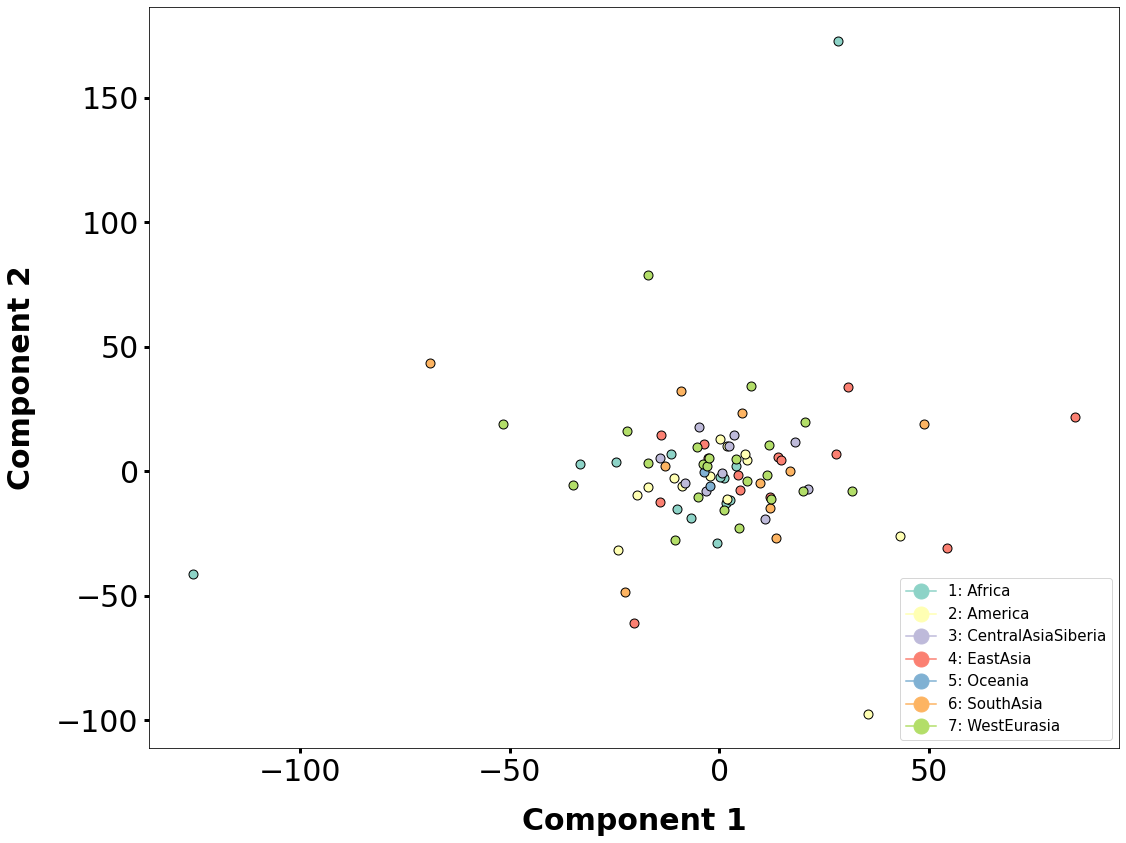

In [210]:
df_mds= pd.DataFrame(mds_results,
                          columns=['component_1','component_2', 'component_3'],
                          index=features.index)



df_mds = features.merge(df_mds, left_index=True, right_index=True)
df_mds

mdsplot= plot_scatter_cluster(data=df_mds, abscissa='component_1', ordinate='component_2', label_horizontal='Component 1', label_vertical='Component 2', factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)




# CNVs and CNVR only in gene regions
 
To get CNV and CNVR overlapped in gene regions, you have to run the script CNVnator_genes_filter.py first, it takes ~1 and half day to finish. The output are two csv files called: sgdp_gene_regions.csv and sgdp_gene_regions_cnvr.csv for cnv and cnvr respectively.

In [236]:
individual_cnv_cnvr = pd.read_table("/branchinecta/jbazanwilliamson/No_telo_no_centro_QDNASEQ/cnvr_qdnaseq/individual_cnv_cnvr.txt")

individual_cnv_cnvr['Chr'] = individual_cnv_cnvr['Chr'].astype(str)

individual_cnv_cnvr = individual_cnv_cnvr.pivot_table(index=["CNVR_ID", "Chr", "Start", "End"], 
                    columns='Sample_ID', 
                    values='CNV_Value').reset_index()

np_cnvr = individual_cnv_cnvr.to_numpy()
individual_cnv_cnvr

Sample_ID,CNVR_ID,Chr,Start,End,SAMEA3302610,SAMEA3302613,SAMEA3302615,SAMEA3302618,SAMEA3302619,SAMEA3302621,...,SAMEA3302748,SAMEA3302750,SAMEA3302755,SAMEA3302756,SAMEA3302757,SAMEA3302762,SAMEA3302766,SAMEA3302770,SAMEA3302773,SAMEA3302779
0,CNVR_1,1,810001,930000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CNVR_10,1,20790001,21240000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CNVR_100,2,68025001,68610000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CNVR_101,2,69450001,70305000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CNVR_102,2,70995001,71250000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,CNVR_956,22,47055001,49485000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952,CNVR_96,2,54540001,55695000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
953,CNVR_97,2,57795001,58245000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
954,CNVR_98,2,60555001,62145000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
h3_sdgp_cnvr_df = pd.DataFrame(individual_cnv_cnvr)



h3_sdgp_cnvr_df.columns = list(individual_cnv_cnvr)

h3_sdgp_cnvr_df = h3_sdgp_cnvr_df.drop_duplicates()
h3_sdgp_cnvr_df


counts = h3_sdgp_cnvr_df.iloc[:,4:283]
#counts = counts.fillna(0)

counts



,SAMEA3302610,SAMEA3302613,SAMEA3302615,SAMEA3302618,SAMEA3302619,SAMEA3302621,SAMEA3302630,SAMEA3302631,SAMEA3302632,SAMEA3302634,...,SAMEA3302748,SAMEA3302750,SAMEA3302755,SAMEA3302756,SAMEA3302757,SAMEA3302762,SAMEA3302766,SAMEA3302770,SAMEA3302773,SAMEA3302779
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
#track features for pca & tsne
count = counts.T
features = anotation.merge(count, left_index=True, right_index=True)
features = features.loc[:,["7-Gender","10-Region", "11-Country"]]
features

#imputation and normalization 
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x = imp.fit_transform(counts.T)
x = StandardScaler().fit_transform(x)


#PCA
pca = PCA(n_components=3)
pca_results = pca.fit_transform(x)

df_pca= pd.DataFrame(pca_results,
                          columns=['component_1','component_2', 'component_3'],
                          index=features.index)




df_pca = features.merge(df_pca, left_index=True, right_index=True)
df_pca

,7-Gender,10-Region,11-Country,component_1,component_2,component_3
SAMEA3302647,M,Africa,SierraLeone,0.026775,-0.157897,-0.005433
SAMEA3302748,F,Africa,SierraLeone,-4.646109,-0.452179,-1.977277
SAMEA3302675,M,WestEurasia,Jordan,-0.236987,0.203259,0.777739
SAMEA3302729,M,WestEurasia,Jordan,0.024402,0.027941,0.070366
SAMEA3302635,M,WestEurasia,France,0.072013,0.480690,0.278083
...,...,...,...,...,...,...
SAMEA3302660,M,CentralAsiaSiberia,Russia,0.058110,-0.186918,0.014164
SAMEA3302684,F,WestEurasia,Italy(Tuscany),-0.017700,0.151900,-0.032863
SAMEA3302709,F,America,Peru,-0.065279,0.262081,0.376286
SAMEA3302662,F,America,Brazil,0.066172,-0.142627,0.068109


                   7-Gender      11-Country  component_1  component_2  \
10-Region                                                               
Africa                    M     SierraLeone     0.026775    -0.157897   
Africa                    F     SierraLeone    -4.646109    -0.452179   
WestEurasia               M          Jordan    -0.236987     0.203259   
WestEurasia               M          Jordan     0.024402     0.027941   
WestEurasia               M          France     0.072013     0.480690   
...                     ...             ...          ...          ...   
CentralAsiaSiberia        M          Russia     0.058110    -0.186918   
WestEurasia               F  Italy(Tuscany)    -0.017700     0.151900   
America                   F            Peru    -0.065279     0.262081   
America                   F          Brazil     0.066172    -0.142627   
WestEurasia               F          Russia    -0.023415     0.248512   

                    component_3  
10-Region       

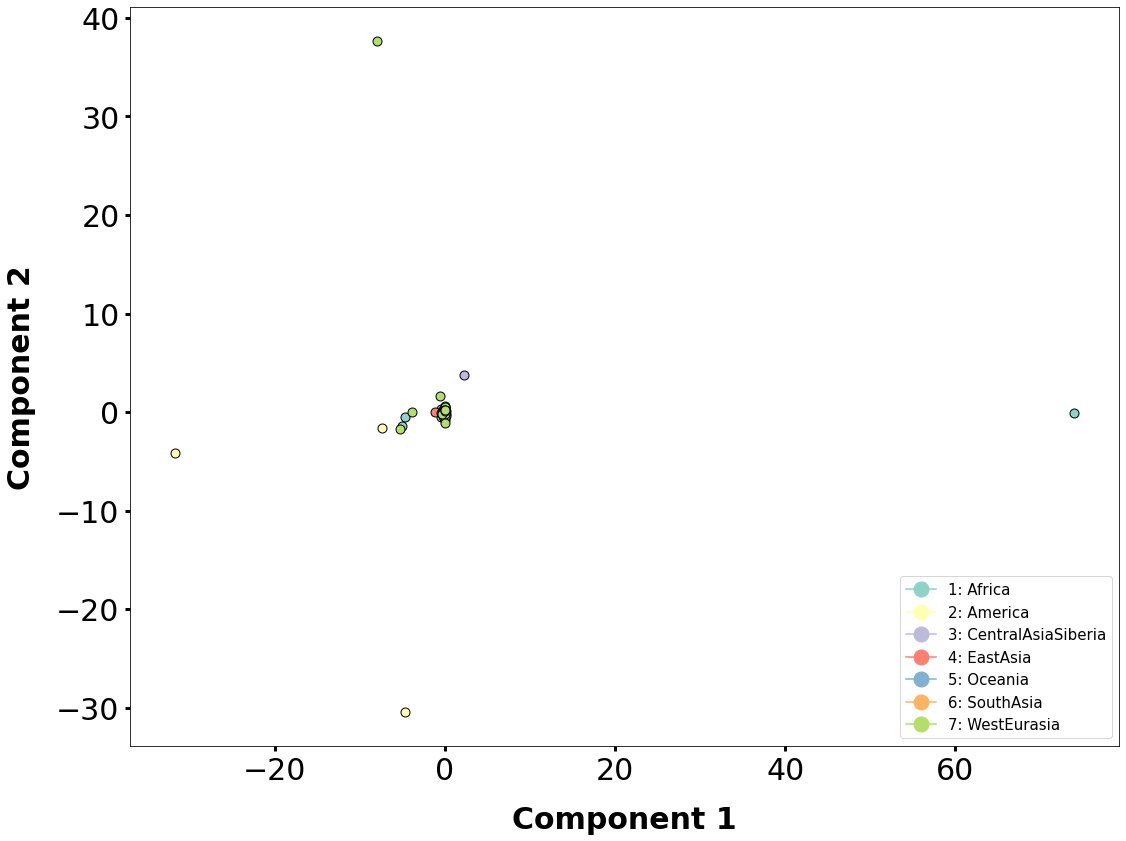

In [145]:
pcaplot= plot_scatter_cluster(data=df_pca, abscissa='component_1', ordinate='component_2', label_horizontal='Component 1', label_vertical='Component 2', factor='10-Region', fonts=define_font_properties(), colors=define_color_properties(), legend=True)

#poner variacion de componentes.

In [144]:
pca.explained_variance_ratio_

array([0.28294906, 0.10093319, 0.07860625])

In [25]:
def plot_scatter_cluster(
data=None,
abscissa=None,
ordinate=None,
label_horizontal=None,
label_vertical=None,
factor=None,
fonts=None,
colors=None,
legend=None,
):
    """
    Creates a figure of a chart of type histogram to represent the frequency
    distribution of a single series of values.
    arguments:
        data (object): Pandas data frame of groups, series, and values
        abscissa (str): name of data column with independent variable
        ordinate (str): name of data column with dependent variable
        label_horizontal (str): label for horizontal axis
        label_vertical (str): label for vertical axis
        factor (str): name of data column with groups or factors of samples
        fonts (dict<object>): references to definitions of font properties
        colors (dict<tuple>): references to definitions of color properties
        legend (bool): whether to include a legend for series on the chart
    raises:
    returns:
        (object): figure object
    """
##########
# Organize data.
# Separate points by groups.
# Define groups.
    data = data.copy(deep=True)
    data.set_index(
        factor,
append=False,
drop=True,
inplace=True
    )
    print(data)
    groups = data.groupby(level=[factor])
    print("Count of groups by factor: " + str(len(groups)))
    colors_series = list(seaborn.color_palette("Set3", n_colors=len(groups)))
##########
# Create figure.
    figure = matplotlib.pyplot.figure(
    figsize=(15.748, 11.811),
    tight_layout=True
    )
# Create axes.
    axes = matplotlib.pyplot.axes()
    axes.set_xlabel(
    xlabel=label_horizontal,
labelpad=20,
alpha=1.0,
backgroundcolor=colors["white"],
color=colors["black"],
fontproperties=fonts["properties"]["one"]
    )
    axes.set_ylabel(
        ylabel=label_vertical,
        labelpad=20,
        alpha=1.0,
        backgroundcolor=colors["white"],
        color=colors["black"],
        fontproperties=fonts["properties"]["one"]
    )
    axes.tick_params(
        axis="both",
        which="both",
        direction="out",
        length=5.0,
        width=3.0,
        color=colors["black"],
        pad=5,
        labelsize=fonts["values"]["one"]["size"],
        labelcolor=colors["black"]
    )
# Plot points for values from each group.
    index = 0
    for name, group in groups:
        values_x = group[abscissa].to_list()
        values_y = group[ordinate].to_list()
        handle = axes.plot(
            values_x,
            values_y,
linestyle="",
marker="o",
markersize=9,
markeredgecolor=colors["black"],#colors_series[index],
markerfacecolor=colors_series[index]
        )
        index += 1
        pass
# Plot labels for each group.
    labels = []
    index = 0
    for name, group in groups:
        values_x = group[abscissa].to_list()
        mean_x = statistics.median(values_x)
        values_y = group[ordinate].to_list()
        mean_y = statistics.median(values_y)
#        axes.text(
#            mean_x,
#            mean_y,
#str(index+1),
#backgroundcolor=colors["white_faint"],
#color=colors["black"],
#fontproperties=fonts["properties"]["three"],
#horizontalalignment="center",
#verticalalignment="center"
#        )
        label = str(index+1) + ": " + name
        labels.append(label)
        index += 1
        pass
# Create legend.
# Create custome elements for the legend
    elements = create_legend_elements(
colors=colors_series,
labels=labels
    )
    axes.legend(
handles=elements,
loc="lower right",
prop=fonts["properties"]["four"],
    )
    return figure




In [26]:
def define_font_properties():
    """
    Defines font properties.
    arguments:
    raises:
    returns:
        (dict<object>): references to definitions of font properties
    """
# Define font values.
    values_one = {
"family": "sans-serif",
"style": "normal",
"variant": "normal",
"stretch": 1000,
"weight": 1000,
"size": 30
    }
    values_two = {
"family": "sans-serif",
"style": "normal",
"variant": "normal",
"stretch": 500,
"weight": 1000,
"size": 25
    }
    values_three = {
"family": "sans-serif",
"style": "normal",
"variant": "normal",
"stretch": 500,
"weight": 1000,
"size": 20
    }
    values_four = {
"family": "sans-serif",
"style": "normal",
"variant": "normal",
"stretch": 500,
"weight": 500,
"size": 15
    }
# Define font properties.
    properties_one = matplotlib.font_manager.FontProperties(
family=values_one["family"],
style=values_one["style"],
variant=values_one["variant"],
stretch=values_one["stretch"],
weight=values_one["weight"],
size=values_one["size"]
    )
    properties_two = matplotlib.font_manager.FontProperties(
family=values_two["family"],
style=values_two["style"],
variant=values_two["variant"],
stretch=values_two["stretch"],
weight=values_two["weight"],
size=values_two["size"]
    )
    properties_three = matplotlib.font_manager.FontProperties(
family=values_three["family"],
style=values_three["style"],
variant=values_three["variant"],
stretch=values_three["stretch"],
weight=values_three["weight"],
size=values_three["size"]
    )
    properties_four = matplotlib.font_manager.FontProperties(
family=values_four["family"],
style=values_four["style"],
variant=values_four["variant"],
stretch=values_four["stretch"],
weight=values_four["weight"],
size=values_four["size"]
    )
# Compile and return references.
    return {
"values": {
"one": values_one,
"two": values_two,
"three": values_three,
"four": values_four
        },
"properties": {
"one": properties_one,
"two": properties_two,
"three": properties_three,
"four": properties_four
        }
    }

In [27]:
def define_color_properties():
    """
    Defines color properties.
    arguments:
    raises:
    returns:
        (dict<tuple>): references to definitions of color properties
    """
# Black.
    black = (0.0, 0.0, 0.0, 1.0)
# White.
    white = (1.0, 1.0, 1.0, 1.0)
    white_faint = (1.0, 1.0, 1.0, 0.75)
# Blue.
    blue = (0.0, 0.2, 0.5, 1.0)
    blue_faint = (0.0, 0.2, 0.5, 0.75)
# Orange.
    orange = (1.0, 0.6, 0.2, 1.0)
    orange_faint = (1.0, 0.6, 0.2, 0.75)
# Compile and return references.
    return {
"black": black,
"white": white,
"white_faint": white_faint,
"blue": blue,
"blue_faint": blue_faint,
"orange": orange,
"orange_faint": orange_faint
    }

In [28]:
def create_legend_elements(
colors=None,
labels=None,
):
    """
    Creates custom elements for legend.
    arguments:
        colors (list<dict>): colors
        labels (str): name of data column with independent variable
    raises:
    returns:
        (list<object>): elements for legend
    """
    elements = []
    for index in range(len(labels)):
        element = matplotlib.lines.Line2D(
            [0],
            [0],
            marker="o",
            color=colors[index],
            label=labels[index],
            markerfacecolor=colors[index],
            markersize=15,
        )
        elements.append(element)
    return elements